In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
(train_data, train_label),(test_data, test_label) = imdb.load_data(num_words = 10000)

In [4]:
len(test_data)

25000

In [5]:
len(train_data)

25000

In [6]:
train_label[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [7]:
max([max(seq) for seq in train_data])

9999

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [9]:
import numpy as np

In [10]:
def vectorized_seq(sequence, dimension = 10000):
    result = np.zeros((len(sequence), dimension))
    for i, seq in enumerate(sequence):
        result[i ,seq] = 1
    return result

In [11]:
x_train = vectorized_seq(train_data)
y_test = vectorized_seq(test_data)

In [12]:
print(train_data[0])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [13]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [14]:
x_label = np.array(train_label).astype("float32")
y_label = np.array(test_label).astype("float32")

In [15]:
print(x_label[0])
print(y_label[0])

1.0
0.0


In [16]:
from tensorflow.keras import models, layers, optimizers

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape = (10000,), activation = "relu"))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [18]:
model.compile(
              loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(),
              metrics = ['acc']
)

In [19]:
train_val = x_train[:10000]
train_partial_train = x_train[10000:]
train_val_label = x_label[:10000]
train_partial_label = x_label[10000:]

In [20]:
history = model.fit(train_partial_train,train_partial_label, epochs = 20, batch_size = 512, 
                    validation_data = (train_val, train_val_label))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 274us/sample - loss: 0.5128 - acc: 0.7826 - val_loss: 0.3838 - val_acc: 0.8722
Epoch 2/20
15000/15000 [==============================] - 3s 168us/sample - loss: 0.3085 - acc: 0.8995 - val_loss: 0.3058 - val_acc: 0.8862
Epoch 3/20
15000/15000 [==============================] - 1s 95us/sample - loss: 0.2260 - acc: 0.9293 - val_loss: 0.2838 - val_acc: 0.8875
Epoch 4/20
15000/15000 [==============================] - 1s 93us/sample - loss: 0.1769 - acc: 0.9433 - val_loss: 0.2727 - val_acc: 0.8915
Epoch 5/20
15000/15000 [==============================] - 1s 96us/sample - loss: 0.1453 - acc: 0.9534 - val_loss: 0.2787 - val_acc: 0.8889
Epoch 6/20
15000/15000 [==============================] - 1s 99us/sample - loss: 0.1173 - acc: 0.9633 - val_loss: 0.3160 - val_acc: 0.8777
Epoch 7/20
15000/15000 [==============================] - 1s 98us/sample - loss: 0.0981 - acc: 0.9692 - val_loss: 

In [21]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [22]:
hist_dict.values()

dict_values([[0.5127938364028931, 0.30846692012151083, 0.22601284226576487, 0.17688953424692153, 0.14529473139444987, 0.11732483921051025, 0.09813564093907674, 0.08093479789098104, 0.06619953121344248, 0.05208962527910868, 0.0436519845465819, 0.03575710378785928, 0.02970196031530698, 0.021415816154082615, 0.02055357293188572, 0.011136358849704266, 0.011119838776687782, 0.011409372998277345, 0.0047472270662585895, 0.005622867272049189], [0.7826, 0.89953333, 0.9292667, 0.9432667, 0.9534, 0.9632667, 0.9692, 0.9774, 0.9826667, 0.9882, 0.98913336, 0.99226665, 0.9938667, 0.9961333, 0.9958, 0.9993333, 0.9988667, 0.9978667, 0.99986666, 0.9994], [0.38384629125595093, 0.30577509870529174, 0.28380972576141356, 0.27268632025718686, 0.2786651471614838, 0.31595275659561156, 0.3078644762516022, 0.3268296112537384, 0.35380830430984495, 0.3798718084335327, 0.4051045471191406, 0.43321709752082826, 0.46059062027931214, 0.49146033043861387, 0.5277282351016999, 0.5596423447608948, 0.6023856090545654, 0.625

In [23]:
import matplotlib.pyplot as plt

In [24]:
train_loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
train_acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

In [25]:
epochs = range (1, 21)

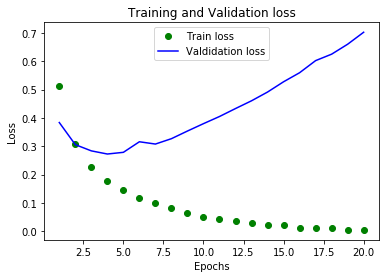

In [26]:
plt.plot(epochs, train_loss, 'go', label = "Train loss")
plt.plot(epochs, val_loss, 'b', label = "Valdidation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = "upper center")
plt.show()

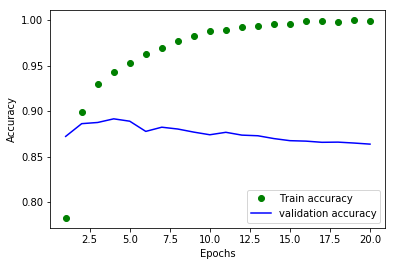

In [27]:
plt.plot(epochs, train_acc, 'go', label = "Train accuracy")
plt.plot(epochs, val_acc, "b", label = "validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [28]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape = (10000,), activation = "relu"))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))


model.compile(loss = "binary_crossentropy", optimizer = optimizers.RMSprop(), metrics = ['acc'])


history_1 = model.fit(x_train, x_label, epochs = 4, batch_size = 512)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 75us/sample - loss: 0.4942 - acc: 0.8066
Epoch 2/4
25000/25000 [==============================] - 1s 58us/sample - loss: 0.2872 - acc: 0.9055
Epoch 3/4
25000/25000 [==============================] - 1s 57us/sample - loss: 0.2112 - acc: 0.9268
Epoch 4/4
25000/25000 [==============================] - 1s 57us/sample - loss: 0.1725 - acc: 0.9401


In [30]:
result = model.evaluate(y_test, y_label)

25000/25000 [==============================] - 3s 113us/sample - loss: 0.2977 - acc: 0.8820


In [31]:
print(result)

[0.2976608890247345, 0.88204]


In [32]:
model.predict(y_test)

array([[0.1709585 ],
       [0.99998343],
       [0.8116019 ],
       ...,
       [0.08790119],
       [0.06916829],
       [0.5916366 ]], dtype=float32)

In [33]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape = (10000,), activation = "relu"))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))


model.compile(loss = "binary_crossentropy", optimizer = optimizers.RMSprop(), metrics = ['acc'])


history_1 = model.fit(x_train, x_label, epochs = 4, batch_size = 512)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 3s 135us/sample - loss: 0.5017 - acc: 0.7662
Epoch 2/4
25000/25000 [==============================] - 2s 78us/sample - loss: 0.2722 - acc: 0.9063
Epoch 3/4
25000/25000 [==============================] - 2s 65us/sample - loss: 0.2034 - acc: 0.9269
Epoch 4/4
25000/25000 [==============================] - 2s 62us/sample - loss: 0.1704 - acc: 0.9380


In [34]:
result = model.evaluate(y_test, y_label)

25000/25000 [==============================] - 2s 97us/sample - loss: 0.3037 - acc: 0.8822


In [35]:
model.predict(y_test)

array([[0.19055046],
       [0.9967919 ],
       [0.88725245],
       ...,
       [0.116492  ],
       [0.08415634],
       [0.8063047 ]], dtype=float32)

In [37]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape = (10000,), activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))


model.compile(loss = "binary_crossentropy", optimizer = optimizers.RMSprop(), metrics = ['acc'])


history_1 = model.fit(x_train, x_label, epochs = 4, batch_size = 512)

result = model.evaluate(y_test, y_label)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 4s 142us/sample - loss: 0.4285 - acc: 0.8381
Epoch 2/4
25000/25000 [==============================] - 2s 72us/sample - loss: 0.2660 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 2s 62us/sample - loss: 0.2119 - acc: 0.9271
Epoch 4/4
25000/25000 [==============================] - 2s 92us/sample - loss: 0.2866 - acc: 0.8844


In [38]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape = (10000,), activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))


model.compile(loss = "mse", optimizer = optimizers.RMSprop(), metrics = ['acc'])


history_1 = model.fit(x_train, x_label, epochs = 4, batch_size = 512)

result = model.evaluate(y_test, y_label)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 3s 116us/sample - loss: 0.1415 - acc: 0.8290
Epoch 2/4
25000/25000 [==============================] - 2s 67us/sample - loss: 0.0798 - acc: 0.9115
Epoch 3/4
25000/25000 [==============================] - 1s 59us/sample - loss: 0.0621 - acc: 0.9301
Epoch 4/4
25000/25000 [==============================] - 2s 83us/sample - loss: 0.0850 - acc: 0.8860


In [39]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape = (10000,), activation = "relu"))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))


model.compile(loss = "mse", optimizer = optimizers.RMSprop(), metrics = ['acc'])


history_1 = model.fit(x_train, x_label, epochs = 4, batch_size = 512)

result = model.evaluate(y_test, y_label)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 3s 117us/sample - loss: 0.1583 - acc: 0.8061
Epoch 2/4
25000/25000 [==============================] - 2s 63us/sample - loss: 0.0796 - acc: 0.9083
Epoch 3/4
25000/25000 [==============================] - 2s 66us/sample - loss: 0.0594 - acc: 0.9296
Epoch 4/4
25000/25000 [==============================] - 2s 83us/sample - loss: 0.0853 - acc: 0.8854


In [40]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape = (10000,), activation = "relu"))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))


model.compile(loss = "mse", optimizer = optimizers.RMSprop(), metrics = ['acc'])


history_1 = model.fit(x_train, x_label, epochs = 4, batch_size = 512)

result = model.evaluate(y_test, y_label)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 23s 914us/sample - loss: 0.1485 - acc: 0.8190
Epoch 2/4
25000/25000 [==============================] - 2s 64us/sample - loss: 0.0754 - acc: 0.9099
Epoch 3/4
25000/25000 [==============================] - 2s 61us/sample - loss: 0.0564 - acc: 0.9331
Epoch 4/4
25000/25000 [==============================] - 2s 87us/sample - loss: 0.0906 - acc: 0.8783


In [41]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape = (10000,), activation = "relu"))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))


model.compile(loss = "mse", optimizer = optimizers.Adam(), metrics = ['acc'])


history_1 = model.fit(x_train, x_label, epochs = 4, batch_size = 512)

result = model.evaluate(y_test, y_label)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 3s 137us/sample - loss: 0.1844 - acc: 0.7582
Epoch 2/4
25000/25000 [==============================] - 1s 60us/sample - loss: 0.0794 - acc: 0.9142
Epoch 3/4
25000/25000 [==============================] - 1s 59us/sample - loss: 0.0519 - acc: 0.9412
Epoch 4/4
25000/25000 [==============================] - 2s 79us/sample - loss: 0.0903 - acc: 0.8783


In [42]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape = (10000,), activation = "relu"))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))


model.compile(loss = "mse", optimizer = optimizers.RMSprop(), metrics = ['acc'])


history_1 = model.fit(x_train, x_label, epochs = 4, batch_size = 128)


Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 3s 104us/sample - loss: 0.1108 - acc: 0.8613
Epoch 2/4
25000/25000 [==============================] - 2s 71us/sample - loss: 0.0604 - acc: 0.9209
Epoch 3/4
25000/25000 [==============================] - 2s 72us/sample - loss: 0.0470 - acc: 0.9413
Epoch 4/4
25000/25000 [==============================] - 2s 74us/sample - loss: 0.0379 - acc: 0.9530


In [43]:
result = model.evaluate(y_test, y_label)

25000/25000 [==============================] - 2s 77us/sample - loss: 0.1008 - acc: 0.8719


In [44]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape = (10000,), activation = "relu"))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))


model.compile(loss = "mse", optimizer = optimizers.Adam(), metrics = ['acc'])


history_1 = model.fit(x_train, x_label, epochs = 4, batch_size = 128)

result = model.evaluate(y_test, y_label)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 86us/sample - loss: 0.1196 - acc: 0.8468
Epoch 2/4
25000/25000 [==============================] - 2s 69us/sample - loss: 0.0563 - acc: 0.9296
Epoch 3/4
25000/25000 [==============================] - 2s 71us/sample - loss: 0.0403 - acc: 0.9525
Epoch 4/4
25000/25000 [==============================] - 2s 76us/sample - loss: 0.1056 - acc: 0.8676


In [46]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape = (10000,), activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))


model.compile(loss = "binary_crossentropy", optimizer = optimizers.Adam(), metrics = ['acc'])


history_1 = model.fit(x_train, x_label, epochs = 4, batch_size = 512)

result = model.evaluate(y_test, y_label)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 82us/sample - loss: 0.4491 - acc: 0.8178
Epoch 2/4
25000/25000 [==============================] - 2s 65us/sample - loss: 0.2558 - acc: 0.9124
Epoch 3/4
25000/25000 [==============================] - 2s 61us/sample - loss: 0.2023 - acc: 0.9310
Epoch 4/4
25000/25000 [==============================] - 2s 76us/sample - loss: 0.2923 - acc: 0.8830


In [47]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape = (10000,), activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))


model.compile(loss = "mse", optimizer = optimizers.Adam(), metrics = ['acc'])


history_1 = model.fit(x_train, x_label, epochs = 4, batch_size = 512)

result = model.evaluate(y_test, y_label)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 83us/sample - loss: 0.1536 - acc: 0.8198
Epoch 2/4
25000/25000 [==============================] - 2s 64us/sample - loss: 0.0800 - acc: 0.9108
Epoch 3/4
25000/25000 [==============================] - 1s 59us/sample - loss: 0.0619 - acc: 0.9327
Epoch 4/4
25000/25000 [==============================] - 2s 78us/sample - loss: 0.0863 - acc: 0.8840


In [49]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape = (10000,), activation = "relu"))
model.add(layers.Dense(1, activation = "tanh"))


model.compile(loss = "mse", optimizer = optimizers.RMSprop(), metrics = ['acc'])


history_1 = model.fit(x_train, x_label, epochs = 4, batch_size = 512)

result = model.evaluate(y_test, y_label)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 81us/sample - loss: 0.1411 - acc: 0.8082
Epoch 2/4
25000/25000 [==============================] - 2s 71us/sample - loss: 0.0702 - acc: 0.9165
Epoch 3/4
25000/25000 [==============================] - 2s 71us/sample - loss: 0.0523 - acc: 0.9383
Epoch 4/4
25000/25000 [==============================] - 2s 87us/sample - loss: 0.0878 - acc: 0.8811
